In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np

# tensorflow and keras
import tensorflow as tf
from tensorflow import keras

from keras import utils
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


#Load fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


#Preprocess data for modeling

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Underfitting model

In [0]:
# build model
model = models.Sequential()

# flatten
model.add(layers.Flatten(input_shape=(28, 28)))
# dense 1
model.add(layers.Dense(1, activation='sigmoid'))
# final dense
model.add(layers.Dense(10, activation='sigmoid'))

In [0]:
# summarize model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train model

In [0]:
epochs = 15
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,  
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
32576/60000 [===============>..............] - ETA: 1s - loss: 0.3577 - acc: 0.8759

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-4464dce3cc48>", line 5, in <module>
    validation_data=(test_images, test_labels))
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1178, in fit
    validation_freq=validation_freq)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 204, in fit_loop
    outs = fit_function(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2979, in __call__
    return self._call(inputs)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2937, in _call
    fetched = self._callable_fn(*array_vals)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py", line 1472, in __call__
    run_metadata_ptr)
Keyboa

KeyboardInterrupt: ignored

In [0]:
# save model
model.save('mnist_underfit')

##Display model

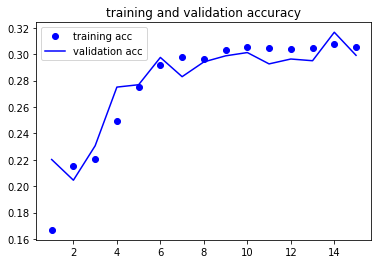

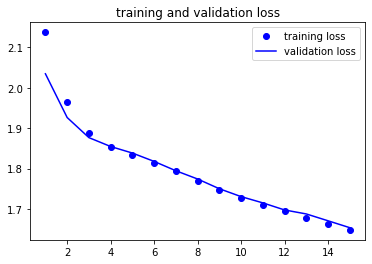

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

#Overfitting model

In [0]:
# build model
model = models.Sequential()

# flatten
model.add(layers.Flatten(input_shape=(28, 28)))
# dense 1
model.add(layers.Dense(128, activation='relu'))
# final dense
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# summarize model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train model

In [0]:
epochs = 15
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,  
                    validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 7s 114us/step - loss: 0.5555 - acc: 0.8117 - val_loss: 0.4417 - val_acc: 0.8405
Epoch 2/15
60000/60000 [==============================] - 6s 100us/step - loss: 0.3901 - acc: 0.8595 - val_loss: 0.4015 - val_acc: 0.8565
Epoch 3/15
60000/60000 [==============================] - 6s 100us/step - loss: 0.3537 - acc: 0.8726 - val_loss: 0.3818 - val_acc: 0.8648
Epoch 4/15
60000/60000 [==============================] - 6s 100us/step - loss: 0.3286 - acc: 0.8794 - val_loss: 0.3598 - val_acc: 0.8731
Epoch 5/15
60000/60000 [==============================] - 6s 100us/step - loss: 0.3113 - acc: 0.8873 - val_loss: 0.3613 - val_acc: 0.8675
Epoch 6/15
60000/60000 [==============================] - 6s 100us/step - loss: 0.2984 - acc: 0.8904 - val_loss: 0.3531 - val_acc: 0.8732
Epoch 7/15
60000/600

In [0]:
# save model
model.save('mnist_overfit')

##Display model

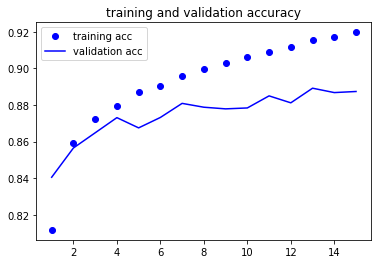

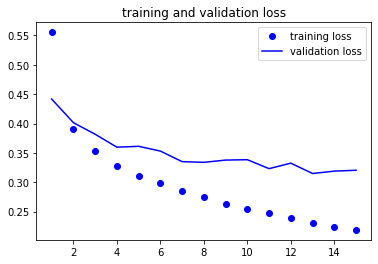

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

#Good fit model

In [0]:
# build model
model = models.Sequential()

# flatten
model.add(layers.Flatten(input_shape=(28, 28)))
# dense 1
model.add(layers.Dense(32, activation='relu'))
# final dense
model.add(layers.Dense(10, activation='softmax'))

In [15]:
# summarize model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train model

In [0]:
epochs = 15
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,  
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 56us/step - loss: 0.5577 - acc: 0.8087 - val_loss: 0.4779 - val_acc: 0.8317
Epoch 2/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.4250 - acc: 0.8519 - val_loss: 0.4439 - val_acc: 0.8442
Epoch 3/15
25344/60000 [===========>..................] - ETA: 1s - loss: 0.3877 - acc: 0.8650

In [0]:
# save model
model.save('mnist_goodfit')

##Display model

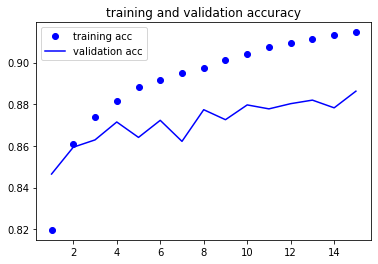

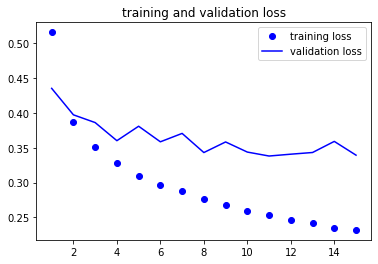

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()